In [ ]:
######################################
# 1 Gerekli kütüphanelerin yüklenmesi :
######################################
# Görüntü verileriyle çalışmayı kolaylaştıran bir dizi özellik ve araç içeren kütüphanedir. Dönüşüm işlemleri için torchvision kütüphanesini kullanırız.
import torchvision
import torchvision.transforms as transforms
# Diziler ve matrisler üzerinde matematiksel işlem yapmak için numpy kütüphanesini kullanırız.
import numpy as np
# Veri analizi ve manipülasyonu için pandas kütüphanesini kullanırız.
import pandas as pd
# Google tarafından geliştirilmiş açık kaynaklı bir derin öğrenme kütüphanesidir. Derin öğrenme modelleri ve yapay zeka projeleri geliştirmek için kullanılır.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras import Input
# Hem denetimli hem de denetimsiz öğrenme algoritmalarını destekleyen scikit-learn, veri işleme ve modelleme süreçlerini kolaylaştırmak için kapsamlı araçlar sunan sklearn kütüphane kullanılır..
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Verileri görselleştirmek ve grafikler oluşturmak için matplotlib kütüphanesini kullanırız.
import matplotlib.pyplot as plt
# Daha yüksek seviyede görselleştirme yapmak seaborn kütüphanesini kullanırız.
import seaborn as sns

In [ ]:
######################################
# 2 Veri Seti Yükleme ve Ön İşleme :
# 2.1. Veri Yükleme :
######################################
# Görüntüleri model için uygun format ve boyuta belirlenir.
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# Veri seti indirilerek dönüşümü ve boyutlandırılması sağlanır.
train_dataset = torchvision.datasets.GTSRB(
    root='./data', split='train', download=True, transform=transform)

# Veriyi yükleme işlemini gerçekleştirip data frame doldururuz.
data_list = []

for img, label in train_dataset:
    data_list.append((img.numpy().flatten(), label))

df = pd.DataFrame(data_list, columns=['features', 'label'])

print(df.head())

100%|██████████| 187M/187M [00:06<00:00, 30.8MB/s]


Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb
                                            features  label
0  [0.29411766, 0.2901961, 0.3254902, 0.39607844,...      0
1  [0.27058825, 0.29411766, 0.29411766, 0.3019608...      0
2  [0.28235295, 0.30588236, 0.30588236, 0.4470588...      0
3  [0.26666668, 0.29803923, 0.34901962, 0.5529412...      0
4  [0.28627452, 0.2901961, 0.29411766, 0.43529412...      0


In [ ]:
######################################
# 2.2.Eksik Değerlerin İşlenmesi:
######################################

# Eksik değerleri kontrol ettiğimizde boş değer olmadığını görüyoruz.
print(df.isnull().sum())

features    0
label       0
dtype: int64


In [ ]:
# Eğer boş değer olsaydı aşağıdaki gözüktüğü gibi feature mean değerleri hesaplayarak NaN değerleri doldurabilirdik.
feature_means = np.nanmean(np.vstack(df['features']), axis=0)

df['features'] = df['features'].apply(lambda x: np.nan_to_num(x, nan=feature_means))

print(df.head())

                                            features  label
0  [0.29411766, 0.2901961, 0.3254902, 0.39607844,...      0
1  [0.27058825, 0.29411766, 0.29411766, 0.3019608...      0
2  [0.28235295, 0.30588236, 0.30588236, 0.4470588...      0
3  [0.26666668, 0.29803923, 0.34901962, 0.5529412...      0
4  [0.28627452, 0.2901961, 0.29411766, 0.43529412...      0


In [ ]:
###############################################
# 2.3.Veri Setini Eğitim ve Test Olarak Ayırma:
###############################################

# sklearn.model_selection.train_test_split fonksiyonunu kullanarak veriyi %80 eğitim, %20 test olarak ikiye ayırdık.
X = np.vstack( df['features'] )
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42 )

print("Eğitim Seti:", X_train.shape)
print("Test Seti:", X_test.shape)

Eğitim Seti: (21312, 3072)
Test Seti: (5328, 3072)


In [ ]:
##########################################
# 2.4.Özellik Ölçekleme (Feature Scaling):
##########################################

# StandartScaler yöntemi kullanarak veriyi ortalama 0 ve standart sapma 1 olacak şekilde ölçekleriz.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Ölçeklendirilmiş Eğitim seti:", X_train.shape)
print("Ölçeklendirilmiş Test seti:", X_test.shape)

Ölçeklendirilmiş Eğitim seti: (21312, 3072)
Ölçeklendirilmiş Test seti: (5328, 3072)


Iteration 1, loss = 2.27432224
Iteration 2, loss = 0.99869304
Iteration 3, loss = 0.59792631
Iteration 4, loss = 0.45346536
Iteration 5, loss = 0.35498978
Iteration 6, loss = 0.28880300
Iteration 7, loss = 0.26412324
Iteration 8, loss = 0.21179076
Iteration 9, loss = 0.20849616
Iteration 10, loss = 0.17076228
Iteration 11, loss = 0.17886009
Iteration 12, loss = 0.14088289
Iteration 13, loss = 0.16837997
Iteration 14, loss = 0.12989888
Iteration 15, loss = 0.11311345
Iteration 16, loss = 0.10548858
Iteration 17, loss = 0.10931152
Iteration 18, loss = 0.12475213
Iteration 19, loss = 0.08378713
Iteration 20, loss = 0.08873530
Iteration 21, loss = 0.10906488
Iteration 22, loss = 0.11338907
Iteration 23, loss = 0.11051797
Iteration 24, loss = 0.08433822
Iteration 25, loss = 0.09601608
Iteration 26, loss = 0.07206766
Iteration 27, loss = 0.09136951
Iteration 28, loss = 0.08131081
Iteration 29, loss = 0.09509984
Iteration 30, loss = 0.09066479
Iteration 31, loss = 0.09057966
Iteration 32, los

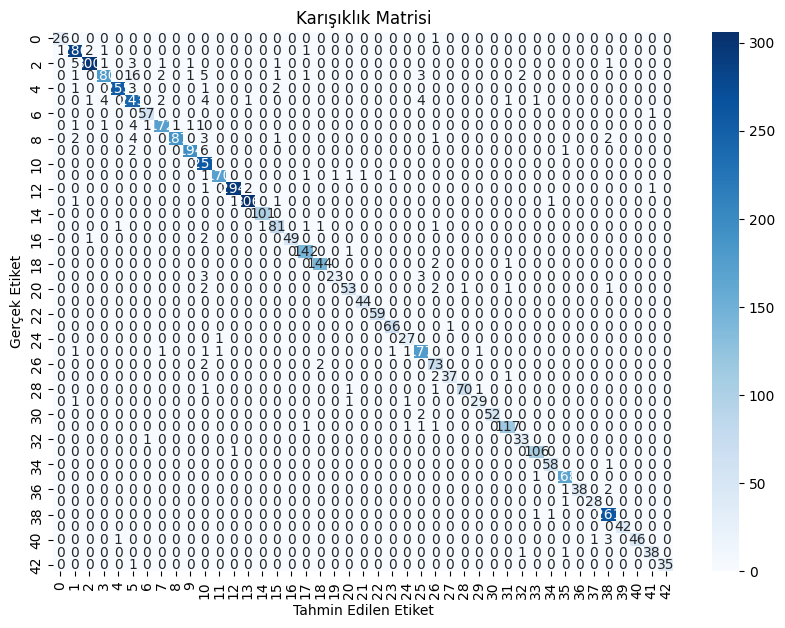

In [ ]:
###############################################
# 3.Model Eğitimi ve Hiperparametre Denemeleri:
# 3.1.MLP Modeli:
# 4.Performans Ölçümleri
# 4.1.Confusion Matrix:
# 4.2.Performans Metrikleri:
###############################################

from sklearn.neural_network import MLPClassifier

# MLP modelini oluştururulur.
# mlp = MLPClassifier( hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=300, learning_rate='constant',  random_state=42 )

# Oluşturduğumuz modeli eğitim verisiyle eğitiriz.
# mlp.fit(X_train, Y_train)

# Farklı hiperparametrelerle MLP modeli oluşturma ve eğitme
#hidden_layer_sizes_list = [(100,), (100, 50)]
hidden_layer_sizes_list = [(100, 50)]
#activation_list = ['relu', 'tanh', 'identity', 'logistic']
activation_list = ['relu']
#learning_rate_list = ['constant', 'adaptive', 'invscaling']
learning_rate_list = ['constant']

for hidden_layer_sizes in hidden_layer_sizes_list:
  for activation in activation_list:
    for learning_rate in learning_rate_list:
      mlp = MLPClassifier( hidden_layer_sizes = hidden_layer_sizes,
                         activation = activation,
                         learning_rate = learning_rate,
                         max_iter = 100,
                         alpha = 0.0001,
                         solver = 'adam',
                         verbose = True,
                         random_state = 21,
                         tol = 0.000000001)

      # Model eğitim verisiyle eğitilir.
      mlp.fit(X_train, Y_train)

      # Test verisiyle tahmin yapılır.
      Y_pred = mlp.predict(X_test)

      accuracy = mlp.score(X_test, Y_test)
      print(" ")
      print("########## PARAMETRELER ##########")
      print(f"Katmanlar: {hidden_layer_sizes}, Aktivasyon Fonksiyonu: {activation}, Learning Rate: {learning_rate} --> Test Seti Doğruluğu: {accuracy:.2f}")
      print(" ")

      print("########## PERFORMANS METRİKLERİ ##########")
      print(classification_report(Y_test, Y_pred))

      print("########## CONFUSION MATRIX ##########")
      # Confusion Matrix hesaplanarak görselleştirilir.
      cm = confusion_matrix(Y_test, Y_pred)
      print(confusion_matrix(Y_test, Y_pred))

      plt.figure(figsize=(10, 7))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title('Karışıklık Matrisi')
      plt.xlabel('Tahmin Edilen Etiket')
      plt.ylabel('Gerçek Etiket')
      plt.show()

# Aşağıda farklı parametreler ile çalıştırılan model ve performans değerlendirmeleri gözükmektedir.

# Katmanlar: (100,), Aktivasyon Fonksiyonu: relu, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.95
# Katmanlar: (100,), Aktivasyon Fonksiyonu: relu, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.95
# Katmanlar: (100,), Aktivasyon Fonksiyonu: relu, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.95
# Katmanlar: (100,), Aktivasyon Fonksiyonu: tanh, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.93
# Katmanlar: (100,), Aktivasyon Fonksiyonu: tanh, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.93
# Katmanlar: (100,), Aktivasyon Fonksiyonu: tanh, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.93
# Katmanlar: (100,), Aktivasyon Fonksiyonu: identity, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.94
# Katmanlar: (100,), Aktivasyon Fonksiyonu: identity, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.94
# Katmanlar: (100,), Aktivasyon Fonksiyonu: identity, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.94
# Katmanlar: (100,), Aktivasyon Fonksiyonu: logistic, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.96*
# Katmanlar: (100,), Aktivasyon Fonksiyonu: logistic, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.96*
# Katmanlar: (100,), Aktivasyon Fonksiyonu: logistic, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.96*
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: relu, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.96*
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: relu, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.96*
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: relu, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.96*
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: tanh, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.92
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: tanh, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.92
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: tanh, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.92
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: identity, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.94
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: identity, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.94
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: identity, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.94
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: logistic, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.95
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: logistic, Learning Rate: adaptive --> Test Seti Doğruluğu(Accuracy): 0.95
# Katmanlar: (100, 50), Aktivasyon Fonksiyonu: logistic, Learning Rate: invscaling --> Test Seti Doğruluğu(Accuracy): 0.95

# En iyi sonuçları * ile belirtilmiştir. Hiden Layer tek katman (100,) iken aktivasyon kodu 'logistic' olduğunda ve Hiden Layer çift katman (100,50) iken aktivasyon kodu 'relu' olduğunda iyi sonuçlar gerçekleşmiştir.
# # Katmanlar: (100, 50), Aktivasyon Fonksiyonu: relu, Learning Rate: constant --> Test Seti Doğruluğu(Accuracy): 0.96* detaylı inceleyecek olursak
# iki gizli katman ile doğrusal olmayan dönüşüm kullanarak sabit bir öğrenme ile %96 doğruluk oranına ulaşılmıştır.

# 4.1 Karışıklık Matrisi (Confusion Matrix) Yorumu:
# Ana diyagonal sol üstten sağ alta doğru doğru sınıflandırılan örneklerin sayısını gösterir.Diyagonal dışındaki değerler yanlış sınıflandırmalar çok düşük seviyelerde.
# Modelin genel olarak doğru tahmin yapma oranının yüksek olduğunu gözüküyor.

# 4.2.Performans Metrikleri Yorumu:
# İlk iterasyonda loss (kayıp) değeri 2.27 gibi yüksek bir değerle başlıyor. Her iterasyonda düşerek 44. iterasyonda 0.05 civarına kadar geriliyor.
# Modelin artık kayda değer bir iyileşme göstermediği için 44. iterasyonda erken durdurma kriterine ulaşıyor.
# Loss değerinin düşmesi, modelin hatalarını azalttığını ve veri üzerinde daha iyi bir uyum sağladığını gösteriyor.
# Model, tüm sınıflarda genel olarak yüksek bir performansa sahip. F1-score değerleri genellikle 0.90 ile 1.00 arasında.
# 22., 39., 42. sınıflar için f1-score %100 olarak model mükemmel performans göstermiş.
# Bazı sınıflar için  (19.Sınıf (f1-score  %87), 5.Sınıf (f1-score %91) performans biraz düşük. Bu az sayıda örneğe sahip sınıflar veya daha karmaşık dağılımlar nedeniyle olabilir.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
En iyi parametreler: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Test Seti Doğruluğu: 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.95      0.92      0.94       291
           2       0.93      0.95      0.94       313
           3       0.96      0.91      0.93       212
           4       0.97      0.98      0.97       262
           5       0.92      0.95      0.93       261
           6       1.00      1.00      1.00        58
           7       0.95      0.96      0.96       191
           8       0.98      0.91      0.94       200
           9       0.98      1.00      0.99       203
          10       0.97      0.99      0.98       257
          11       0.99      0.95      0.97       176
          12       1.00      0.99      0.99       298
          13       0.97      0.99      0.98      

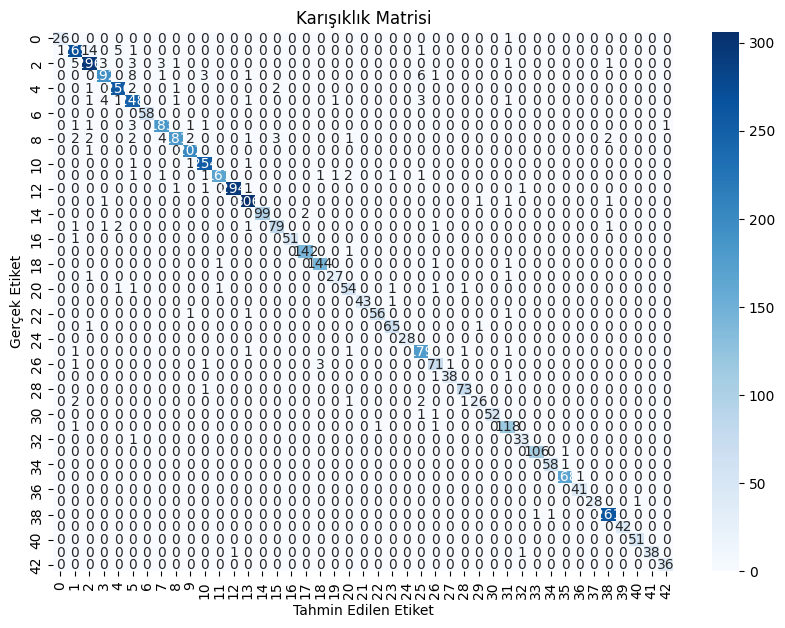

In [ ]:
##############################################################
# 5.Hiperparametre Denemeleri ve Sonuçları Karşılaştırma(MLP):
# 5.1.Hiperparametre Denemeleri(MLP):
##############################################################

from sklearn.model_selection import GridSearchCV

# Parametre ızgarası oluşturuyoruz. Sağlamasını yapabilmek için yukarıdaki parametre listesi ile oluşturdum.
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh', 'identity', 'logistic'],
    'learning_rate': ['constant', 'adaptive', 'invscaling']
}

# MLP modelini oluşturulur
mlp = MLPClassifier(max_iter=100, solver='adam', random_state=42)

# GridSearchCV nesnesi oluşturulur
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Model eğitilir ve bulunan en iyi parametreler yazdırılır
grid_search.fit(X_train, Y_train)
print("En iyi parametreler:", grid_search.best_params_)

# Bulunan en iyi modelin test verisi üzerindeki performansı hesaplanarak yazdırılır.
best_mlp = grid_search.best_estimator_
Y_pred = best_mlp.predict(X_test)

accuracy = best_mlp.score(X_test, Y_test)
print(f"Test Seti Doğruluğu: {accuracy:.2f}")

print(classification_report(Y_test, Y_pred))

# Confusion Matrix hesaplanarak görselleştirilir.
cm = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

# GridSearchCV kullanılarak bulunan parametreler bir önceki adımda test ederek tespit ettiğimiz parametrelerle aynı olduğu görüşmüştür.

In [ ]:
print(X_train.shape[1])
print(X_test.shape[1])
print("Ölçeklendirilmiş Eğitim seti:", X_train.shape)
print("Ölçeklendirilmiş Test seti:", X_test.shape)

3072
3072
Ölçeklendirilmiş Eğitim seti: (21312, 3072)
Ölçeklendirilmiş Test seti: (5328, 3072)


Epoch 1/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.0604 - loss: -17.9877
Epoch 2/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.0562 - loss: -91.6394
Epoch 3/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.0544 - loss: -166.6152
Epoch 4/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0536 - loss: -240.8480
Epoch 5/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.0572 - loss: -315.8702
Epoch 6/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.0569 - loss: -388.8715
Epoch 7/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.0580 - loss: -460.8701
Epoch 8/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.0554 - loss: -536.5264
Epoch 9/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.0583 - loss: -613.3914
Epoch 10/10
5328/5328 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.0543 - loss: -679.9905
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Tahminler: [[1.]
 [1.]
 [1.]
 ...
 [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


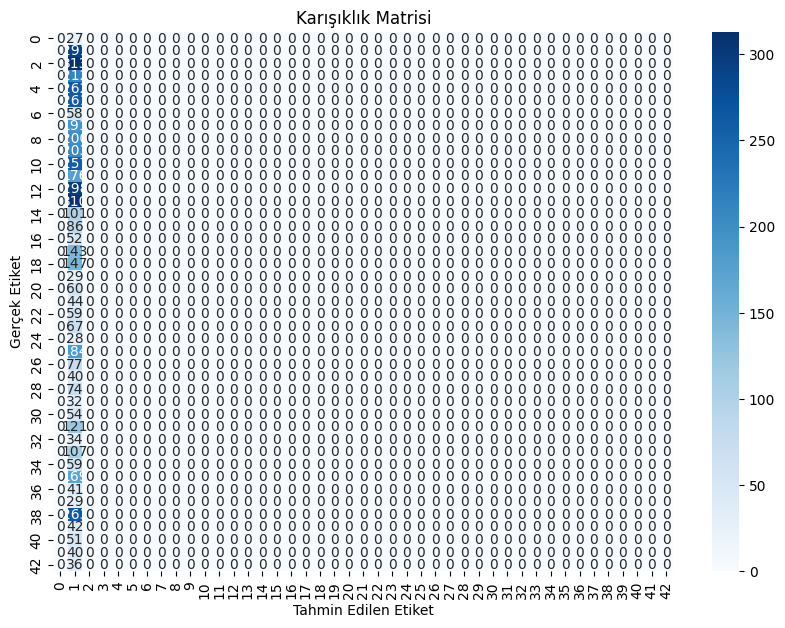

In [ ]:
###############################################
# 3.Model Eğitimi ve Hiperparametre Denemeleri:
# 3.2.RBF Modeli:
# 4.Performans Ölçümleri
# 4.1.Confusion Matrix:
# 4.2.Performans Metrikleri:
###############################################

from sklearn.decomposition import PCA

class RBFLayer(Layer):
    def __init__(self, num_centers, beta=1.0, **kwargs):
        self.num_centers = num_centers
        self.beta = beta
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # RBF merkezlerini başlat
        self.centers = self.add_weight(name='centers',
                                       shape=(self.num_centers, input_shape[-1]),
                                       initializer='random_normal',
                                       trainable=True)
        # Beta (spread) parametresini başlat
        self.betas = self.add_weight(name='betas',
                                     shape=(self.num_centers,),
                                     initializer='ones',
                                     trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Giriş ile merkezler arasındaki uzaklıkları hesapla
        diff = K.expand_dims(inputs, axis=1) - self.centers
        l2 = K.sum(K.square(diff), axis=2)
        rbf = K.exp(-self.betas * l2)  # Gaussian fonksiyonu
        return rbf

# Verimizin boyutu yüksek boyutlu olduğu için RBF katmanı ile uyumlu hale getirmek için boyut düşürülür.
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#pca = PCA(n_components=2)  # Boyutu 2'ye indiriyoruz
#X_train_reduced = pca.fit_transform(X_train_scaled)
#X_test_reduced = pca.transform(X_test_scaled)

# RBF Modeli oluşturulur
model = Sequential()

# Giriş katmanını verimizin features sayısına göre belirlenmesi için X_train.shape[1] ile verimizdeli giriş boyutunu belirleriz.
model.add(Input(shape=(X_train.shape[1],)))

# RBF Katmanını eklenir.
# Merkez sayımız (num_center) çoğaltmak modelin daha fazla karmaşık bir yapıyı öğrenmesine yardımcı olabilir.
# Beta değeri ile modelin genelleme yeteneğini değiştiririz.
model.add( RBFLayer( num_centers=20, beta=0.5 ) )

# Çıkış katmanını eklenir
model.add( Dense( 1, activation='sigmoid' ) )

# Modeli Derlenir.
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

# Modeli Eğitilir.
# Model yakınsama sağlamamış olabilecğeinden Epochs değerini arttırarak değiştirdiğimde modelin performansını değiştirmedi.
# Doğrulama veri seti kullanmak (validation_split=0.2) modelin performansını arttırmadı.
model.fit(X_train, Y_train, epochs=10, batch_size=4, verbose=1)

# Model test edilir.
predictions = model.predict(X_test)
print("Tahminler:", predictions)

# Modeliin değerlendirmesi yapılır.
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Kaybı:', loss)
print('Test Doğruluğu:', accuracy)

# Performans Metriklerini Hesaplama
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
print("########## PERFORMANS METRİKLERİ ##########")
print(classification_report(Y_test, Y_pred_classes))

print("########## CONFUSION MATRIX ##########")
# Confusion Matrix hesaplanarak görselleştirilir.
cm = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred_classes))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

# Model başarısız gözükmektedir ve hiçbir anlamlı öğrenme gerçekleştirmediği gözükmektedir.

# 4.1 Karışıklık Matrisi (Confusion Matrix) Yorumu:
# tüm doğruların sadece bir sınıfta yoğunlaştığı görülüyor.

# 4.2.Performans Metrikleri Yorumu:
# İlk iterasyonda loss (kayıp) değeri başlangıçtan itibaren negatif gidiyor ve her epoch ta negatifleşmeye devam ediyor.
# Eğitim boyunca doğruluk %5 civarında sabit kalmış ve artmamıştır. Buda modelin birşey öğrenemediğini gösteriyor.
# Giriş verisi ile çıkış verisi arasında ilişkiyi yakalayamadığını gösteriyor.
# Test veri setinde %5 kötü bir performans sergilemiş. verinin çoğu tek bir sınıfaa sabitlendiği için doğru sınıfları tahmin edememiş.
# Precision, Recall, F1-Score değerlerinin tamamı 0 burdanda modelin doğru tahmin yapamadığı ortaya çıkıyor.

In [ ]:
##############################################################
# 5.Hiperparametre Denemeleri ve Sonuçları Karşılaştırma(RBF):
# 5.1.Hiperparametre Denemeleri(MLP):
##############################################################

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# RBF kernel'ine sahip bir SVC modeli oluşturulur.
model = SVC(kernel='rbf')

# Optimizasyon için parametre aralığı oluştururuz.
param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parametresi
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel katsayısı
}

# RandomizedSearchCV kullanarak en iyi parametreleri bulunur.
# Cross-Validation 5 verilerek veri seti 5 katmana (fold) ayrılır ve her bir katman doğrulama verisi olarak kullanılarak model eğitilir.
# n_iter 10 verilerek gridSearch ile 10 farklı C ve gamma kombinasyonunu test etmesi sağlanır. 5 katman ile 10 kombinasyonun toplamda 50 farklı model eğitimi yapar.
# Daha küçük C daha düzenli model anlamına gelir. Gamma küçüklüğü uzak noktaların daha fazla etkisi olmasını sağlar.
# Her bir eğitim 15 dk sürdü.
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

# Modeli eğitilir.
random_search.fit(X_train, Y_train)

# Bulunan en iyi parametreler yazdırılır.
print("En iyi parametreler:", random_search.best_params_)

# En iyi modelin test verisi üzerindeki doğruluğu hesaplanır.
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)
print("Test verisi üzerindeki doğruluk:", accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................C=0.1, gamma=0.001; total time=15.1min
[CV] END .................................C=0.1, gamma=0.001; total time=15.2min
[CV] END .................................C=0.1, gamma=0.001; total time=15.6min
[CV] END .................................C=0.1, gamma=0.001; total time=15.5min
[CV] END .................................C=0.1, gamma=0.001; total time=15.4min


# 5.2.Sonuçları Karşılaştırma ve Yorumlama :
GTSRB (German Traffic Sign Recognition Benchmark) veri seti, trafik işaretlerini tanıma üzerine yoğunlaşan bir veri setidir. Bu veri setindeki resimler genellikle zengin görsel bilgilere sahiptir ve çeşitli trafik işaretlerini içerir. Kullandığımız MLP Model tam bağlantılı katmanlardan oluşur ve veriyi öğrenmek için ileri beslemeli ve geri yayılım mekanizmalarını kullanır. RBF ise radyal baz fonksiyonlarını kullanır. Çıkış, giriş verisi ile merkezler arasındaki mesafelere bağlıdır. **MLP (Multi-Layer Perceptron)** ve **RBF (Radial Basis Function)** modellerinden hangisinin daha iyi performans göstereceği, problemin özelliklerine, veri ön işleme yöntemlerine ve model optimizasyonuna göre değişir.Yaptığım yöntem ve model optimizasyonlarına göre MLP Modeli daha iyi öğrenme sağlayarak iyi sonuçlar elde etti. GTSRB gibi karmaşık bir veri setinde genellikle MLP daha iyi performans göstereceğini düşünüyordum. Çünkü görsel verilerin karmaşıklığı nedeni ile MLP daha iyi performans gösterir. Verimiz daha düşük boyutlu olsaydı RBF de daha iyi performans gösterirdi. Görsel veriler genellikle yüksek boyut ve karmaşık olduğu için RBF sınırlı performans göstererek başarısız oldu.

# MEHMET ZÜLKİF OKUMUŞ - 244329008
# YAPAY SİNİR AĞLARI VİZE ÖDEVİ